In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1 seaborn库简介

## 1.1 什么是seaborn？

Seaborn是基于matplotlib的图形可视化python包。它提供了一种高度交互式界面，便于用户能够做出各种有吸引力的统计图表。

Seaborn是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn能做出很具有吸引力的图，而使用matplotlib就能制作具有更多特色的图。应该把Seaborn视为matplotlib的补充，而不是替代物。同时它能高度兼容numpy与pandas数据结构以及scipy与statsmodels等统计模式。

## 1.2 为什么使用seaborn？

Seaborn是一种基于matplotlib的图形可视化库。他提前已经定义好了一套自己的风格，也封装了一系列的方便的绘图函数。如果使用matplotlib，想要绘制精美的图形需要大量的调优代码才能完成，使用seaborn可能就是一行代码的事情。总结一句话：使用seaborn绘图比matplotlib更好看，更简单！

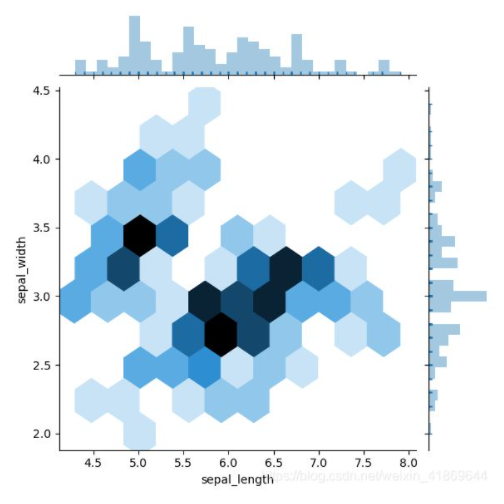

# 2 关系绘图：relplot

统计分析是这样的一个过程：尝试去理解一个数据集中变量之间的关系，以及这些关系如何受到其他变量的影响。可视化是这个过程的核心元素，因为当数据以非常恰当的方式展示出来时，我们可以非常直观地观察到某些趋势或者模式，而这些，就揭示了变量之间的关系。

sns.replot这个函数功能非常强大，可以用来表示多个变量之间的关联关系。默认情况下是绘制散点图，也可以绘制线性图，具体绘制什么图形是通过kind参数来决定的。实际上以下两个函数就是relplot的特例：

* **scatterplot**：relplot(kind='scatter',the default)
* **lineplot**：relplot(kind='line')

## 2.1 基本使用

默认调用seaborn的格式为：

In [2]:
import seaborn as sns

# 设置seaborn样式
sns.set(color_codes=True)

接下来，我们使用数据集tips(小费数据集)来演示散点图relplot(kind='scatter')

In [3]:
# 获取样本数据集tips
tips = pd.read_csv("../data/tips.csv")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


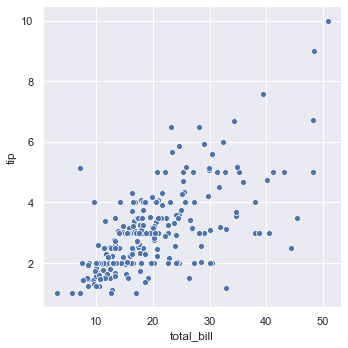

In [4]:
# 绘制散点图.relplot中kind的默认参数为‘scatter’,所以可不写
sns.relplot(x="total_bill",y="tip",data=tips)

## 2.2 添加hue参数

hue参数是用来控制第三个变量的颜色显示的。比如我们在以上图的基础之上体现出星期几的参数，那么可以通过以下代码来实现：

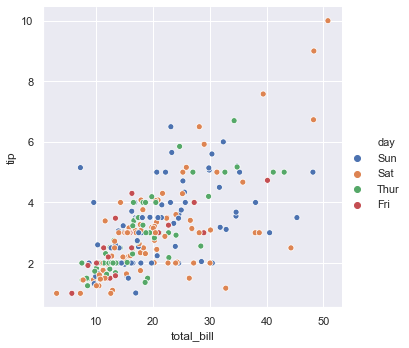

In [5]:
# 添加hue参数，显示第三个变量day的区别
sns.relplot(x="total_bill",y="tip",hue="day",data=tips)

## 2.3 添加col和row参数

col和row，可以将图根据某个属性的值的个数分割成多列或者多行。比如在以上图的基础之上我们想要把Lunch(午餐)和Dinner(晚餐)分割成两个图来显示，那么可以通过以下代码来实现：

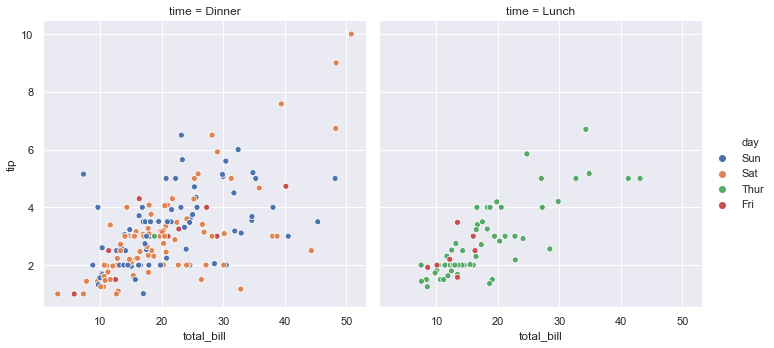

In [6]:
# 添加col参数，把时间的区别显示出来
sns.relplot(x="total_bill",y="tip",hue="day",col="time",data=tips)

* 也可以再在row上添加一个新的变量，比如把性别按照行显示出来，代码如下：

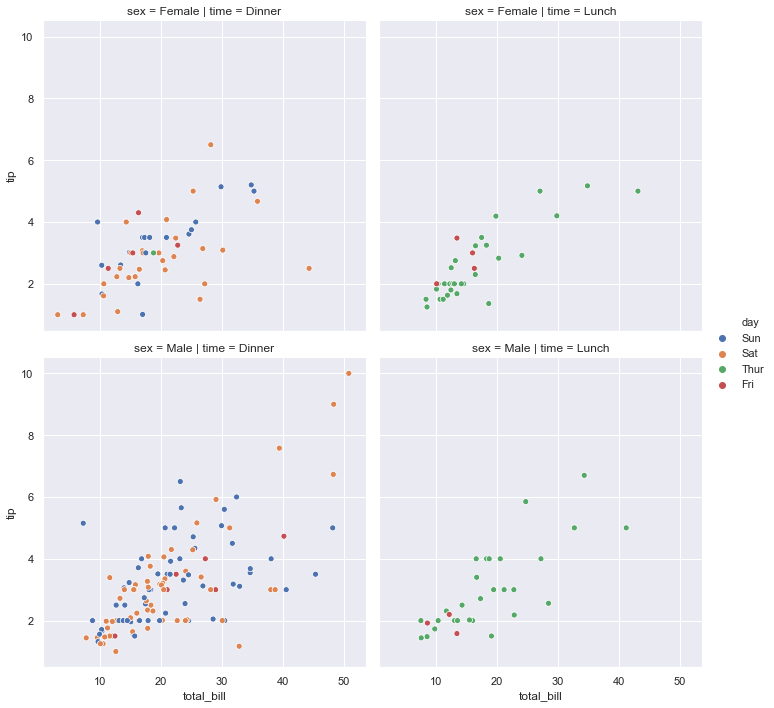

In [7]:
# 添加row参数，把性别的区别展示出来
sns.relplot(x="total_bill",y="tip",hue="day",col="time",
            row="sex",data=tips)

## 2.4 指定具体的列

有时候我们的图有很多，默认情况下会在一行中全部展示出来，那么我们可以通过col_wrap来指定具体多少列。示例代码如下：

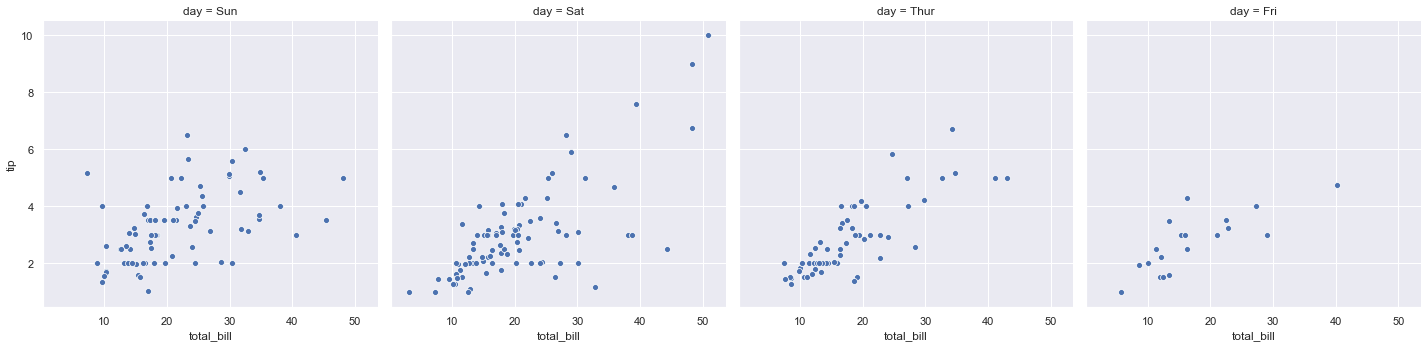

In [8]:
# 默认情况下会在一行中全部展示出来
sns.relplot(x="total_bill",y="tip",col="day",data=tips)

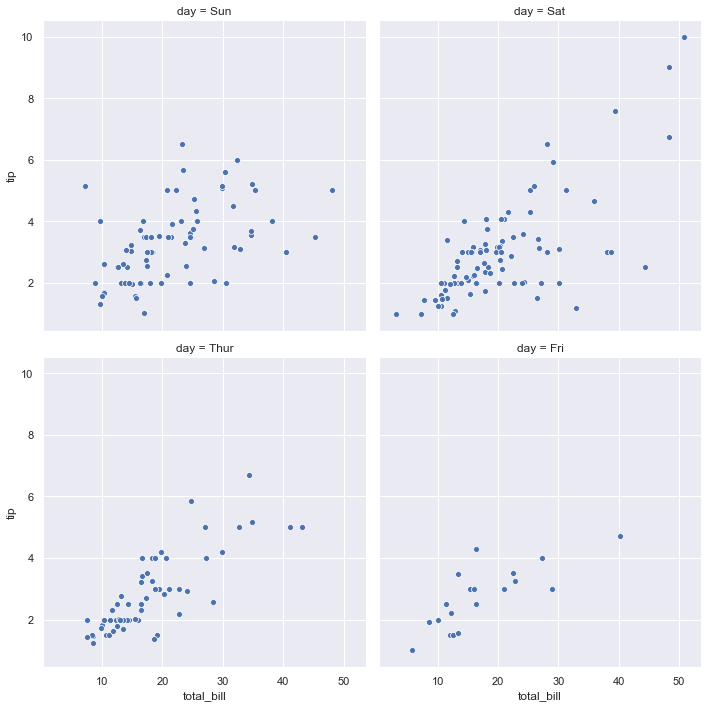

In [9]:
# 可以通过col_wrap来指定具体多少列
sns.relplot(x="total_bill",y="tip",col="day",col_wrap=2,data=tips)

## 2.5 绘制折线图

散点图很高效，但是没有哪种可视化类型可以完美应对所有情况。事实上，我们的可视化呈现方式要适应数据集的种类以及我们想要通过图形回答的问题。

在某些数据集中，我们可能想要理解某个变量随着时间的变化规律，或者想要理解某个连续型的变量。这种情况下，线图会是一个不错的选择。在seaborn中，我们可以通过lineplot()函数或者使用带有kind="line"参数的relplot()来实现线图的绘制。


In [10]:
# 我们导入fmri（核磁共振）数据集
fmri = pd.read_csv("../data/fmri.csv")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


* 在更多复杂的数据集中，会出现一个x轴变量对应了多个观测值（y）的情况。seaborn会默认将多个观测值聚合起来，并且将它们的**均值**以及**95%的置信区间**展示出来：

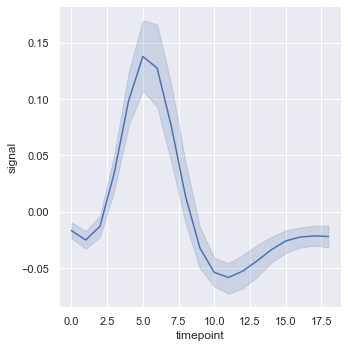

In [11]:
# 使用relplot(kind='line')来绘制折线图
sns.relplot(x="timepoint",y="signal",kind="line",data=fmri)

* 置信区间是通过自助采样法（bootstrapping）计算的，这在遇到大型数据集时可以帮助我们节省时间。当然，我们也可以禁止它。

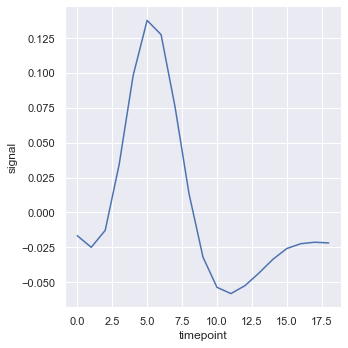

In [12]:
# 禁用置信区间
sns.relplot(x="timepoint", y="signal", ci=None,
            kind="line", data=fmri)

当然也可以添加其他的参数，用来控制整个图的样式和结构。示例代码如下：
* 设置hue为event，就会根据event来绘制不同的颜色
* 设置col为region，就会根据region值的个数来绘制指定个数的图
* 设置style为event，就会根据event来设置线条的样式

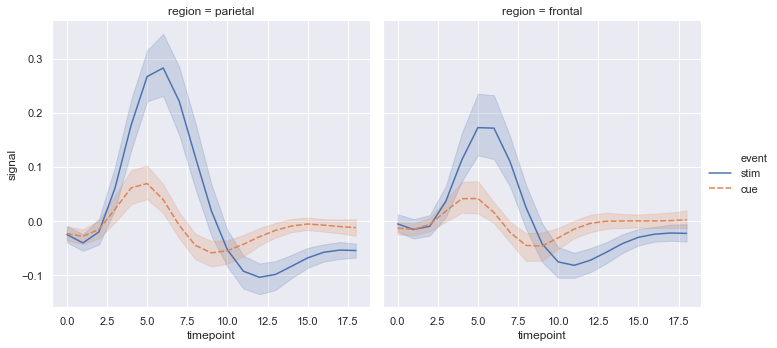

In [13]:
# 添加其他参数
sns.relplot(x="timepoint",y="signal",kind="line",
            hue="event",col="region",style="event",data=fmri)